In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [23]:
# Chemoin vers le dataset Telco Customer Churn
file_path = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Chargement du dataset
df_raw = pd.read_csv(file_path)


In [24]:
# Analyse : types, valeurs uniques, valeurs manquantes, exemple de valeur
types = df_raw.dtypes
missing = df_raw.isnull().sum()
n_unique = df_raw.nunique()
sample_values = df_raw.iloc[0]

# Création du tableau de synthèse
overview = pd.DataFrame({
    "Type": types,
    "Valeurs_uniques": n_unique,
    "Valeurs_manquantes": missing,
    "Exemple_valeur": sample_values
})

overview.sort_values(by="Valeurs_manquantes", ascending=False)

,Type,Valeurs_uniques,Valeurs_manquantes,Exemple_valeur
customerID,object,7043,0,7590-VHVEG
DeviceProtection,object,3,0,No
TotalCharges,object,6531,0,29.85
MonthlyCharges,float64,1585,0,29.85
PaymentMethod,object,4,0,Electronic check
PaperlessBilling,object,2,0,Yes
Contract,object,3,0,Month-to-month
StreamingMovies,object,3,0,No
StreamingTV,object,3,0,No
TechSupport,object,3,0,No


In [25]:
# Aperçu initial : dimensions + 5 premières lignes
df_shape = df_raw.shape
df_preview = df_raw.head()
df_info = df_raw.info()

df_shape, df_preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


((7043, 21),
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV Streamin

In [26]:
###### PROBLEMES A CORRIGER ######

# On réassigne df_raw à une variable plus simple `df` pour continuer les étapes de nettoyage
df = df_raw.copy()

# Conversion de TotalCharges en numérique, les erreurs sont converties en NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Nombre de valeurs manquantes après conversion
missing_after_conversion = df["TotalCharges"].isnull().sum()

# Suppression des lignes avec NaN dans TotalCharges
df = df.dropna(subset=["TotalCharges"])

# Réinitialisation de l'index après suppression
df.reset_index(drop=True, inplace=True)

# Aperçu du dataset nettoyé
df.shape, missing_after_conversion, df.head()

((7032, 21),
 11,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV Str

In [27]:
# Avant nettoyage : type + valeurs non convertibles
df_raw["TotalCharges"].dtype  # devrait être 'object'

# Détecter les lignes problématiques (avant)
invalid_totalcharges = df_raw[pd.to_numeric(df_raw["TotalCharges"], errors='coerce').isna()]
print(f"Lignes invalides : {len(invalid_totalcharges)}")
invalid_totalcharges[["customerID", "tenure", "MonthlyCharges", "TotalCharges"]]


Lignes invalides : 11


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,
753,3115-CZMZD,0,20.25,
936,5709-LVOEQ,0,80.85,
1082,4367-NUYAO,0,25.75,
1340,1371-DWPAZ,0,56.05,
3331,7644-OMVMY,0,19.85,
3826,3213-VVOLG,0,25.35,
4380,2520-SGTTA,0,20.00,
5218,2923-ARZLG,0,19.70,
6670,4075-WKNIU,0,73.35,


In [28]:
print("Avant nettoyage :", df_raw.shape)
print("Après nettoyage :", df.shape)


Avant nettoyage : (7043, 21)
Après nettoyage : (7032, 21)


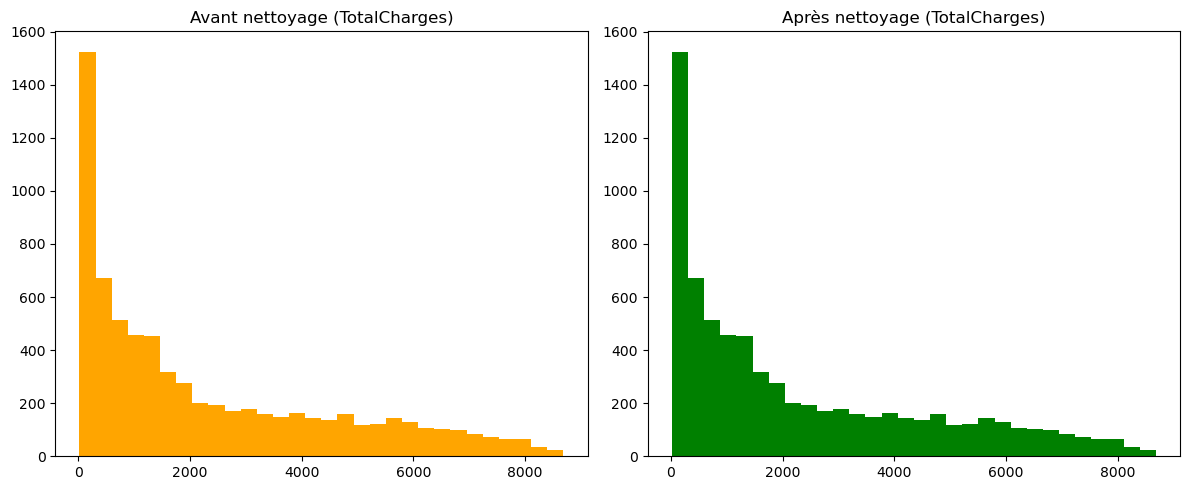

In [29]:
import matplotlib.pyplot as plt

# Avant (en convertissant ce qu'on peut)
df_raw_valid = pd.to_numeric(df_raw["TotalCharges"], errors='coerce')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_raw_valid.dropna(), bins=30, color="orange")
plt.title("Avant nettoyage (TotalCharges)")

plt.subplot(1, 2, 2)
plt.hist(df["TotalCharges"], bins=30, color="green")
plt.title("Après nettoyage (TotalCharges)")

plt.tight_layout()
plt.show()


In [30]:
# Analyse après nettoyage de TotalCharges : types, valeurs manquantes, valeurs uniques, exemples
types_cleaned = df.dtypes
missing_cleaned = df.isnull().sum()
n_unique_cleaned = df.nunique()
sample_values_cleaned = df.iloc[0]

# Création du DataFrame de synthèse après nettoyage
overview_cleaned = pd.DataFrame({
    "Type": types_cleaned,
    "Valeurs_uniques": n_unique_cleaned,
    "Valeurs_manquantes": missing_cleaned,
    "Exemple_valeur": sample_values_cleaned
})

# Tri par valeurs manquantes
overview_cleaned.sort_values(by="Valeurs_manquantes", ascending=False)


,Type,Valeurs_uniques,Valeurs_manquantes,Exemple_valeur
customerID,object,7032,0,7590-VHVEG
DeviceProtection,object,3,0,No
TotalCharges,float64,6530,0,29.85
MonthlyCharges,float64,1584,0,29.85
PaymentMethod,object,4,0,Electronic check
PaperlessBilling,object,2,0,Yes
Contract,object,3,0,Month-to-month
StreamingMovies,object,3,0,No
StreamingTV,object,3,0,No
TechSupport,object,3,0,No


In [31]:
# Liste des colonnes où "No internet service" doit être remplacé par "No"
internet_service_columns = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Remplacement de "No internet service" par "No"
for col in internet_service_columns:
    df[col] = df[col].replace({'No internet service': 'No'})

# Remplacement de "No phone service" par "No" dans la colonne MultipleLines
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Vérification des valeurs uniques après nettoyage
cleaned_values = {col: df[col].unique() for col in internet_service_columns + ['MultipleLines']}
cleaned_values



{'OnlineSecurity': array(['No', 'Yes'], dtype=object),
 'OnlineBackup': array(['Yes', 'No'], dtype=object),
 'DeviceProtection': array(['No', 'Yes'], dtype=object),
 'TechSupport': array(['No', 'Yes'], dtype=object),
 'StreamingTV': array(['No', 'Yes'], dtype=object),
 'StreamingMovies': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No', 'Yes'], dtype=object)}

In [32]:
# Analyse après nettoyage de TotalCharges : types, valeurs manquantes, valeurs uniques, exemples
types_cleaned = df.dtypes
missing_cleaned = df.isnull().sum()
n_unique_cleaned = df.nunique()
sample_values_cleaned = df.iloc[0]

# Création du DataFrame de synthèse après nettoyage
overview_cleaned = pd.DataFrame({
    "Type": types_cleaned,
    "Valeurs_uniques": n_unique_cleaned,
    "Valeurs_manquantes": missing_cleaned,
    "Exemple_valeur": sample_values_cleaned
})

# Tri par valeurs manquantes
overview_cleaned.sort_values(by="Valeurs_manquantes", ascending=False)


,Type,Valeurs_uniques,Valeurs_manquantes,Exemple_valeur
customerID,object,7032,0,7590-VHVEG
DeviceProtection,object,2,0,No
TotalCharges,float64,6530,0,29.85
MonthlyCharges,float64,1584,0,29.85
PaymentMethod,object,4,0,Electronic check
PaperlessBilling,object,2,0,Yes
Contract,object,3,0,Month-to-month
StreamingMovies,object,2,0,No
StreamingTV,object,2,0,No
TechSupport,object,2,0,No


In [33]:
#### Etape 1 : Encodage binaire des colonne a 2 categories

# Yes/No => 0/1

# Colonnes à encoder en binaire (Yes/No → 1/0)
binary_map = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}

binary_columns = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Churn'  # target
]

# Application de l'encodage binaire
for col in binary_columns:
    df[col] = df[col].map(binary_map)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [34]:
# --- ÉTAPE 2 : Encodage one-hot des colonnes à plus de 2 catégories ---

# Colonnes avec 3 catégories ou plus
onehot_columns = ['InternetService', 'Contract', 'PaymentMethod']

# Encodage one-hot avec drop_first pour éviter la multicolinéarité
df = pd.get_dummies(df, columns=onehot_columns, drop_first=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [35]:
# --- ÉTAPE 3 : Suppression de la colonne inutile customerID ---
df.drop("customerID", axis=1, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [36]:
# Aperçu des valeurs d'origine
print("Avant normalisation:")
print(df[num_cols].describe())

# Normalisation
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Aperçu des valeurs après normalisation
print("\nAprès normalisation:")
print(df[num_cols].describe())


Avant normalisation:
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

Après normalisation:
             tenure  MonthlyCharges  TotalCharges
count  7.032000e+03    7.032000e+03  7.032000e+03
mean  -1.126643e-16    6.062651e-17 -1.119064e-16
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.280248e+00   -1.547283e+00 -9.990692e-01
25%   -9.542963e-01   -9.709769e-01 -8.302488e-01
50%   -1.394171e-01    1.845440e-01 -3.908151e-01
75%    9.199259e-01    8.331482e-01  6.668271e-01
max    1.612573e+00    1.793381e+00  2.824261e+00


In [37]:
# 7. Normalisation des variables numériques
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,...,-1.161694,-0.994194,0,False,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,1,0,1,...,-0.260878,-0.173740,0,False,False,True,False,False,False,True
2,1,0,0,0,-1.239504,1,0,1,1,0,...,-0.363923,-0.959649,1,False,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,1,0,1,...,-0.747850,-0.195248,0,False,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0.196178,-0.940457,1,True,False,False,False,False,True,False


In [38]:
df.dtypes.reset_index().rename(columns={'index': 'Colonne', 0: 'Type'})


,Colonne,Type
0,gender,int64
1,SeniorCitizen,int64
2,Partner,int64
3,Dependents,int64
4,tenure,float64
5,PhoneService,int64
6,MultipleLines,int64
7,OnlineSecurity,int64
8,OnlineBackup,int64
9,DeviceProtection,int64


In [39]:
# Liste des colonnes one-hot à convertir
onehot_cols_to_int = [
    "InternetService_Fiber optic",
    "InternetService_No",
    "Contract_One year",
    "Contract_Two year",
    "PaymentMethod_Credit card (automatic)",
    "PaymentMethod_Electronic check",
    "PaymentMethod_Mailed check"
]

# Conversion de ces colonnes en int
df[onehot_cols_to_int] = df[onehot_cols_to_int].astype(int)


In [40]:
df.dtypes.reset_index().rename(columns={'index': 'Colonne', 0: 'Type'})

,Colonne,Type
0,gender,int64
1,SeniorCitizen,int64
2,Partner,int64
3,Dependents,int64
4,tenure,float64
5,PhoneService,int64
6,MultipleLines,int64
7,OnlineSecurity,int64
8,OnlineBackup,int64
9,DeviceProtection,int64


In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,...,-1.161694,-0.994194,0,0,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,-0.260878,-0.173740,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.239504,1,0,1,1,0,...,-0.363923,-0.959649,1,0,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,1,0,1,...,-0.747850,-0.195248,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0.196178,-0.940457,1,1,0,0,0,0,1,0


In [42]:
# 8. Export du dataset préparé
export_path = "../data/processed/prepared_dataset_normalized.csv"
df.to_csv(export_path, index=False)
export_path

'../data/processed/prepared_dataset_normalized.csv'